# ePPR - extended Projection Pursuit Regression
# $$\hat{y}_i=\bar{y}+\sum_{d=0}^D\sum_{m=1}^{M_d}\beta_{m,d}\phi_{m,d}(\alpha_{m,d}^Tx_{i-d})$$
# with    $\frac{1}{n}\sum_{i=1}^n\phi_{m,d}(\alpha_{m,d}^Tx_{i-d})=0$,    $\frac{1}{n}\sum_{i=1}^n\phi_{m,d}^2(\alpha_{m,d}^Tx_{i-d})=1$
# by minimizing    $f=\sum_{i=1}^n(y_i-\hat{y}(x_i))^2+\lambda\sum_{d=0}^D\sum_{m=1}^{M_d}\Vert{L\alpha_{m,d}}\Vert^2$
___
### References
Rapela, J., Felsen, G., Touryan, J., Mendel, J.M., and Grzywacz, N.M. (2010). ePPR: a new strategy for the characterization of sensory cells from input/output data. Network: Computation in Neural Systems 21, 35–90.

Friedman, J.H., and Stuetzle, W. (1981). Projection Pursuit Regression. Journal of the American Statistical Association 76, 817–823.
___

## Simulated Data
#### X: Natural Images
#### Y: Simulated Neuron with MFR=0.56, MIF=4.26

In [76]:
using Revise,FileIO
simdata=load("./simdata.jld");x=simdata["x"];y=simdata["y"];imagesize=(16,16);

Widget{:slider,Int64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:value=>Observable{Int64} with 3 listeners. Value:
12000), Observable{Int64} with 3 listeners. Value:
12000, Scope("knockout-component-6c3e9314-6326-447f-be9d-acbc00e37466", Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>24000,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"value"=>(Observable{Int64} with 3 listeners. Value:
12000, nothing)), Set(String[]), nothing, Any["knockout"=>"C:\\Users\\Alex\\.julia\\packages\\Knockout\\JIqpG\\src\\..\\assets\\knockout.js", "knockout_punches"=>"C:\\Users\\Alex\\.julia\\packages\\Knockout\\JIqpG\\src\\..\\assets\\knockout_punches.js", "C:\\Users\\Alex\\.julia\\packages\\InteractBase\\3SqBl\\src\\..\\assets\\all.js", "C:\\Users\\Alex\\.julia\\packages\\InteractBase\\3SqBl\\src\\..\\assets\\style.css", "C:\\Users\\Alex\\.julia\\packages\\InteractBulma\\Ohu5Y\\src\\..\\assets\\main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":12000}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"knockout-component-6c3e9314-6326-447f-be9d-acbc00e37466\",\"id\":\"ob_16\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"changes\"]=false}),self),this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"knockout-component-6c3e9314-6326-447f-be9d-acbc00e37466\",\"id\":\"ob_15\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"value\"]=false}),self)]\n    

Observable{Any} with 0 listeners. Value:
Gray{Float64}[Gray{Float64}(0.360784) Gray{Float64}(0.47451) … Gray{Float64}(0.333333) Gray{Float64}(0.313725); Gray{Float64}(0.352941) Gray{Float64}(0.466667) … Gray{Float64}(0.32549) Gray{Float64}(0.309804); … ; Gray{Float64}(0.262745) Gray{Float64}(0.258824) … Gray{Float64}(0.0901961) Gray{Float64}(0.0901961); Gray{Float64}(0.258824) Gray{Float64}(0.247059) … Gray{Float64}(0.0784314) Gray{Float64}(0.0823529)]
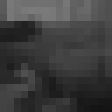
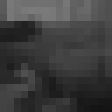

Observable{Any} with 0 listeners. Value:
5

In [77]:
using Interact,Images
i = slider(1:size(x,1))
xvalue = map(j->colorview(Gray,reshape(x[j,:]/255,imagesize...)),observe(i))
yvalue = map(j->y[j],observe(i))
display.([i,xvalue,yvalue]);

## ePPR with Linear Time Interaction

Cross Validation Data Partition: n = 24000, ntrain = 21120 in 5-fold, ntrainfold = 4224 in 8-fold, ntest = 2880 in 8-fold
ePPR Forward Stepwise ...
Fit (Temporal-0, Spatial-1) New Term ...
Get Initial α ...
New Term 1th iteration. TermLoss: 11112.474630241066, PenaltyLoss: 305.0251633942325.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.1104500621411073
                                 step is λ = 0
New Term 2th iteration. TermLoss: 10814.600713713407, PenaltyLoss: 60.50797730472669.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.6838390522108613
                                 step is λ = 0
New Term 3th iteration. TermLoss: 10610.756277362336, PenaltyLoss: 60.01142123258132.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.7149549224196312
                                 step is λ = 0
New Term 4th iteration. TermLoss: 10392.78564357605, PenaltyLoss: 68.53256950264608.
NewtonTrustRegion 

NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9820802293082014
                                 step is λ = 0
New Term 3th iteration. TermLoss: 7656.431570840726, PenaltyLoss: 2.5871827616682874.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = -0.030069226251659257
                                 step is λ = 0
NewtonTrustRegion 2th iteration, r = 0.25
                                 ρ = -0.030069226251659257
                                 step is λ = 0
NewtonTrustRegion 3th iteration, r = 0.0625
                                 ρ = 0.15575720452122016
                                 step is easy
NewtonTrustRegion 4th iteration, r = 0.015625
                                 ρ = 0.8149274038258002
                                 step is easy
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 2.356269479369996e-5.
Fit (Temporal-2, Spatial-3) New Term ...
Get Initial α ...
New Term 1th iteration. TermLoss: 763

Refit (Temporal-2, Spatial-3) New Term ...
New Term 1th iteration. TermLoss: 7490.863712990304, PenaltyLoss: 5.144073820341907.
NewtonTrustRegion 1th iteration, r = 0.0625
                                 ρ = 0.5334105333298665
                                 step is easy
New Term 2th iteration. TermLoss: 7479.566994237718, PenaltyLoss: 7.237899043524506.
NewtonTrustRegion 1th iteration, r = 0.0625
                                 ρ = -0.10424997994111031
                                 step is easy
NewtonTrustRegion 2th iteration, r = 0.015625
                                 ρ = 0.445451256204507
                                 step is easy
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 0.000368315593992956.
ePPR Backward Stepwise ...


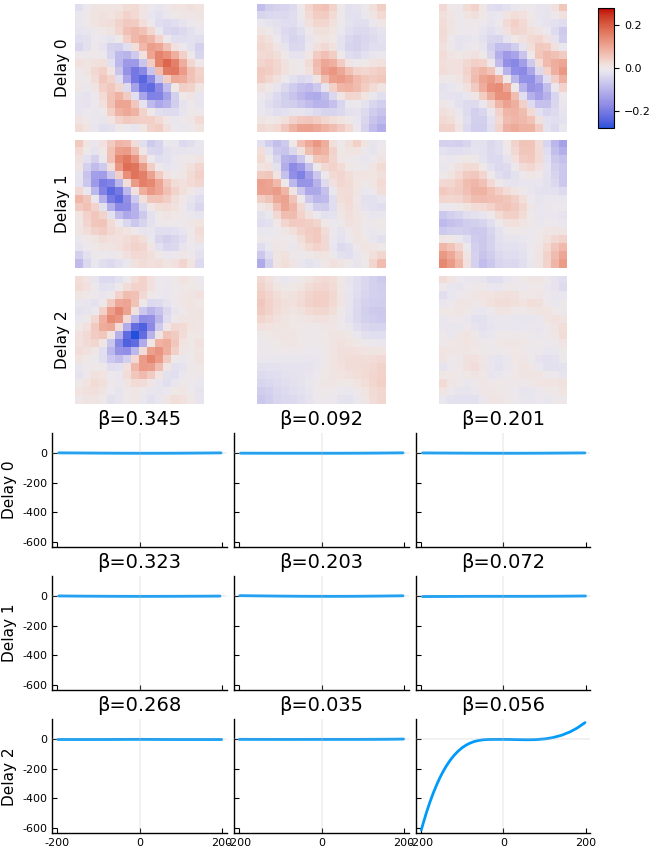

Drop Term: (temporal-2, spatial-2) with β: 0.03518471378847344.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.344698, 0.092104, 0.200963, 0.32259, 0.202873, 0.0716754, 0.267814, 0.0559391]
New βs: [0.362305, 0.101827, 0.212817, 0.336381, 0.225243, 0.0936855, 0.270145, 0.0707387]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 7477.916450725562, PenaltyLoss: 76.09963901553081.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9569744338993195
                                 step is λ = 0
New Term 2th iteration. TermLoss: 7475.520899682252, PenaltyLoss: 77.64668513615761.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9458198835460571
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 2.1894795991783694e-5.
Model Loss increased from 7843.461626094104 to 7846.896136327006. Discard the new term, keep the old one.
Refit (Temporal-0, Spat

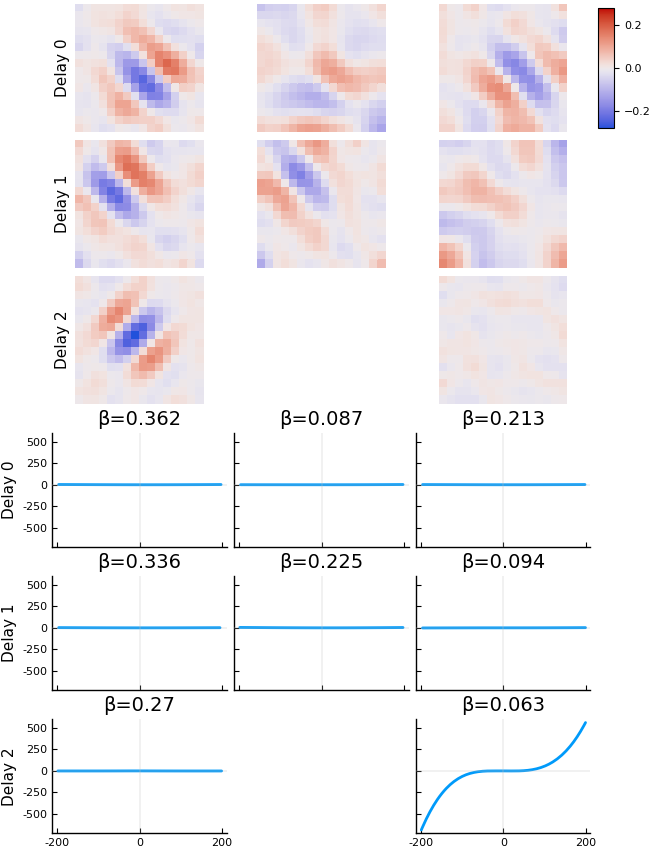

Drop Term: (temporal-2, spatial-3) with β: 0.06296655681168901.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.362305, 0.086992, 0.212817, 0.336381, 0.225243, 0.0936855, 0.270145]
New βs: [0.364458, 0.100555, 0.214522, 0.335953, 0.224791, 0.0934639, 0.276995]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 7520.188123006899, PenaltyLoss: 76.09963901553081.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9625671414097818
                                 step is λ = 0
New Term 2th iteration. TermLoss: 7517.501842967932, PenaltyLoss: 77.88636966292428.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9409547445818214
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 2.2754235185308002e-5.
Model Loss increased from 7875.252504310475 to 7878.611672554332. Discard the new term, keep the old one.
Refit (Temporal-0, Spatial-2) New Term ...
N

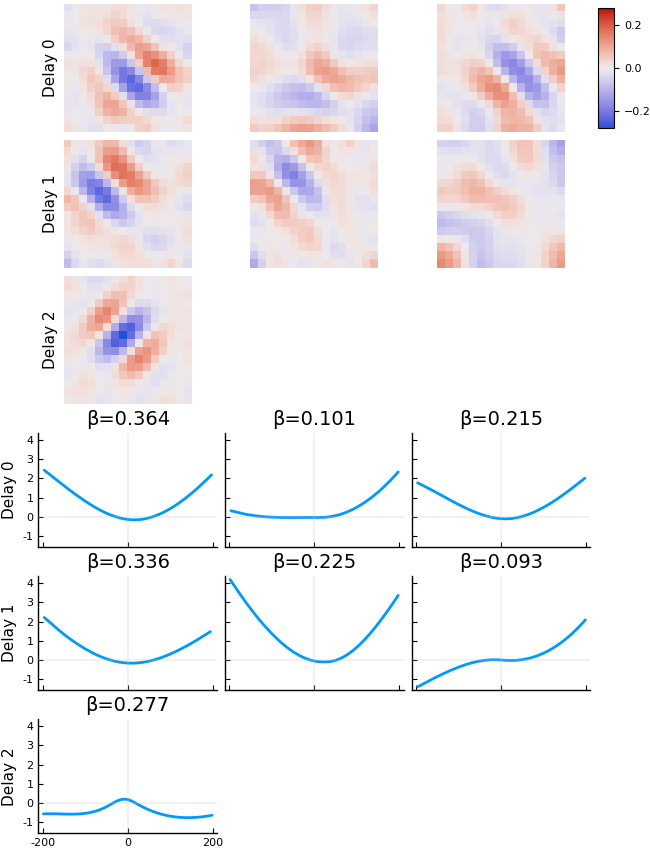

Drop Term: (temporal-1, spatial-3) with β: 0.09346387657474918.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.364458, 0.100555, 0.214522, 0.335953, 0.224791, 0.276995]
New βs: [0.363336, 0.100849, 0.214254, 0.323986, 0.222995, 0.276728]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 7592.311896420517, PenaltyLoss: 76.09963901553081.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9560988860061688
                                 step is λ = 0
New Term 2th iteration. TermLoss: 7590.002768846737, PenaltyLoss: 77.51431792650233.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9528755061170036
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 2.267390376460115e-5.
Model Loss increased from 7934.027357472684 to 7937.047485322196. Discard the new term, keep the old one.
Refit (Temporal-0, Spatial-2) New Term ...
New Term 1th iteration. 

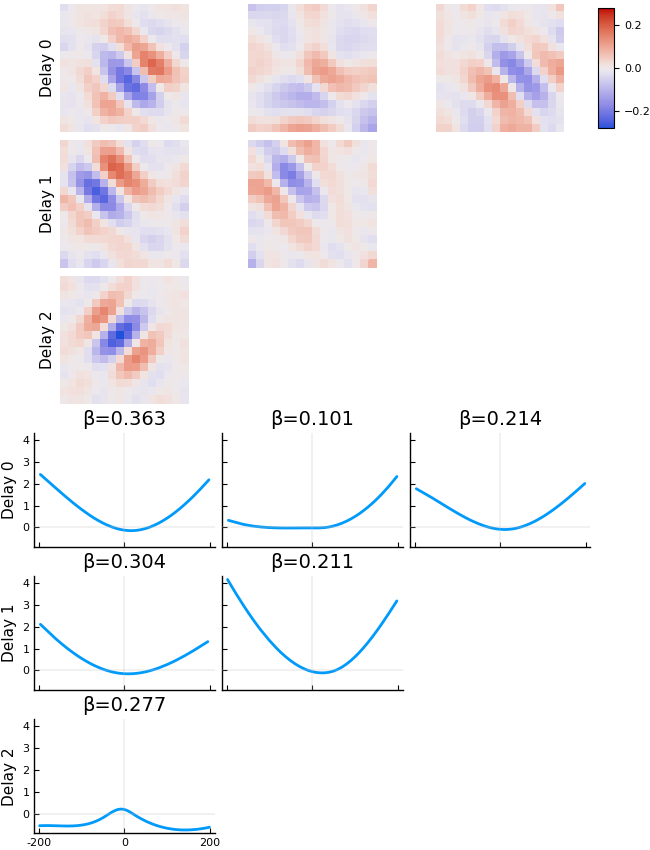

Drop Term: (temporal-0, spatial-2) with β: 0.10084932684777834.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.363336, 0.214254, 0.304288, 0.210798, 0.276728]
New βs: [0.369306, 0.237644, 0.324805, 0.22789, 0.276194]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 7644.217102132776, PenaltyLoss: 76.09963901553081.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9647053403761072
                                 step is λ = 0
New Term 2th iteration. TermLoss: 7633.605201736468, PenaltyLoss: 80.9937097461313.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.957787264843058
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 3.4881330259764686e-5.
Refit (Temporal-0, Spatial-3) New Term ...
New Term 1th iteration. TermLoss: 7620.00232772283, PenaltyLoss: 49.84732653367391.
NewtonTrustRegion 1th iteration, r = 1.0
                           

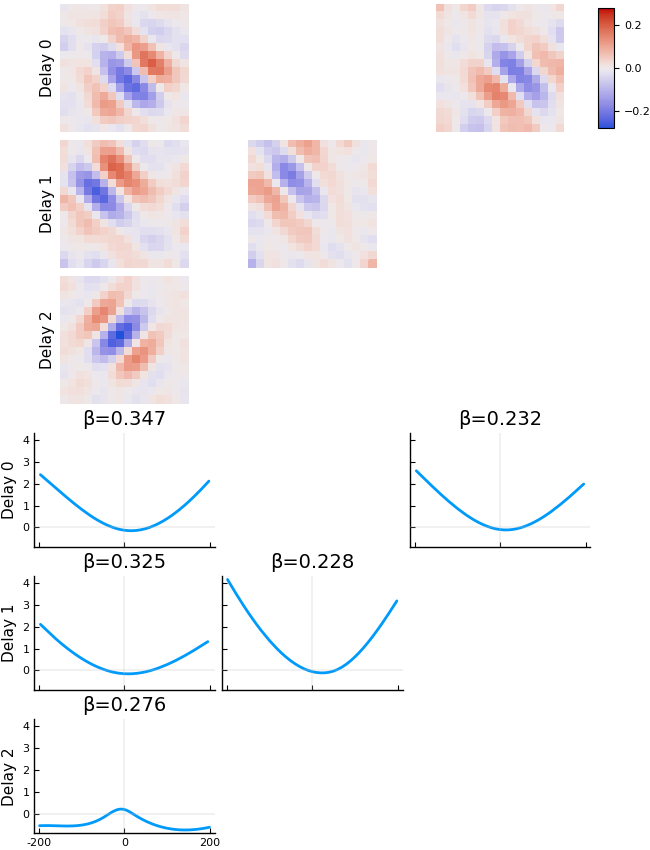

Drop Term: (temporal-1, spatial-2) with β: 0.22788955648269335.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.346766, 0.231775, 0.324805, 0.276194]
New βs: [0.364951, 0.248038, 0.371077, 0.277939]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 8013.918378807263, PenaltyLoss: 81.73404248581191.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9135794323394675
                                 step is λ = 0
New Term 2th iteration. TermLoss: 8005.5677024736815, PenaltyLoss: 85.0014587531327.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.8923882101884044
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 3.304896625678551e-5.
Refit (Temporal-0, Spatial-3) New Term ...
New Term 1th iteration. TermLoss: 8008.323627507482, PenaltyLoss: 58.432063634333026.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.0399

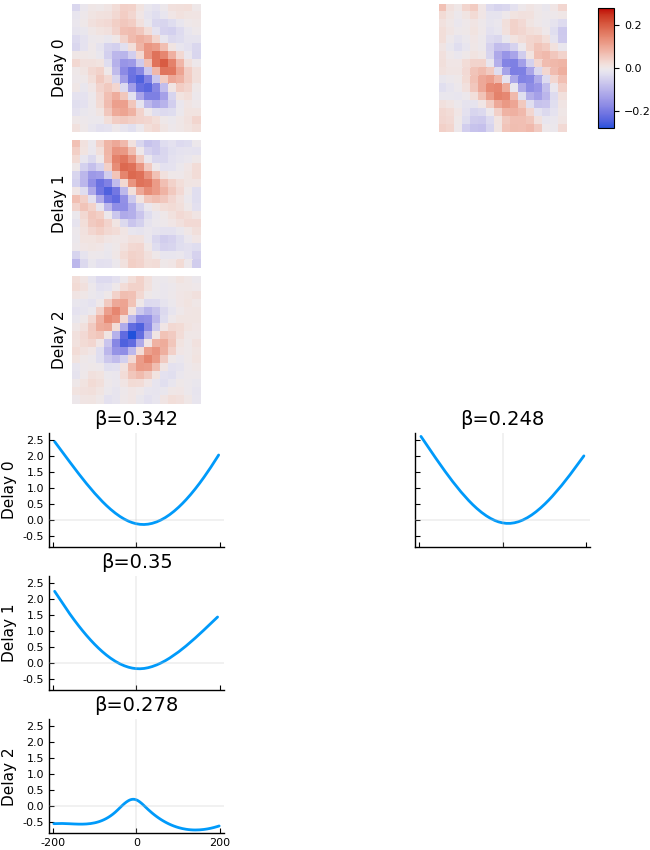

Drop Term: (temporal-0, spatial-3) with β: 0.2480382837541838.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.342212, 0.349756, 0.277939]
New βs: [0.416067, 0.375658, 0.277755]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 8474.440375133088, PenaltyLoss: 85.64263527711307.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.1074131022300744
                                 step is λ = 0
New Term 2th iteration. TermLoss: 8424.45508538849, PenaltyLoss: 95.81354451169528.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.443195721132934
                                 step is λ = 0
New Term 3th iteration. TermLoss: 8421.221517762962, PenaltyLoss: 96.9529995020659.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.4864020504176318
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.0002080842386894277.
Refit (

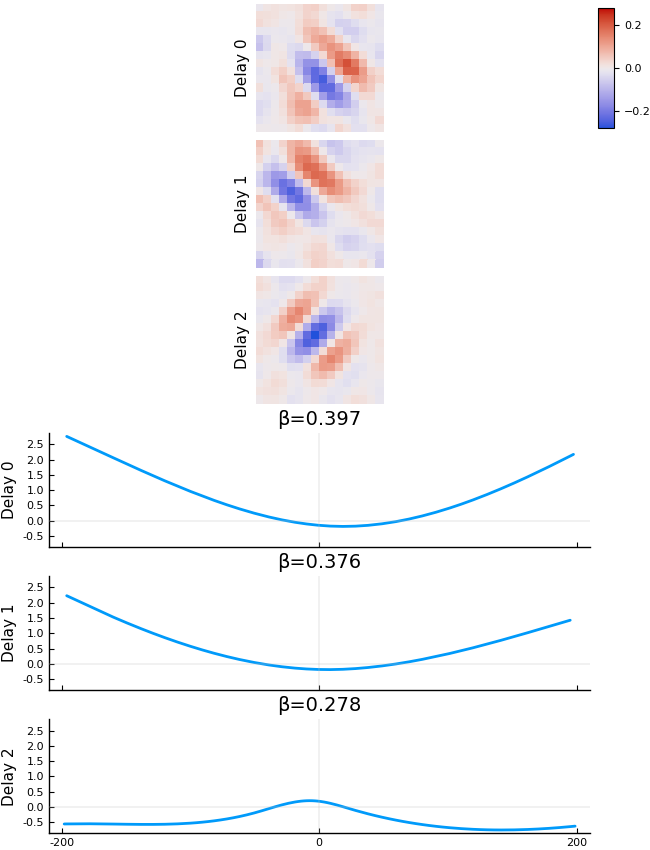

Drop Term: (temporal-2, spatial-1) with β: 0.2777546564563125.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.396876, 0.375658]
New βs: [0.426614, 0.376978]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 9071.391682761525, PenaltyLoss: 98.11857772475221.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.2440091555191306
                                 step is λ = 0
New Term 2th iteration. TermLoss: 9066.199490583358, PenaltyLoss: 102.30754641088346.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.388632236989652
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 0.0001030627412888811.
Model Loss increased from 9241.038563849563 to 9246.041147201257. Discard the new term, keep the old one.
Refit (Temporal-1, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 9073.184149686627, PenaltyLoss: 76.29207394058443.
NewtonTrustRegion 1

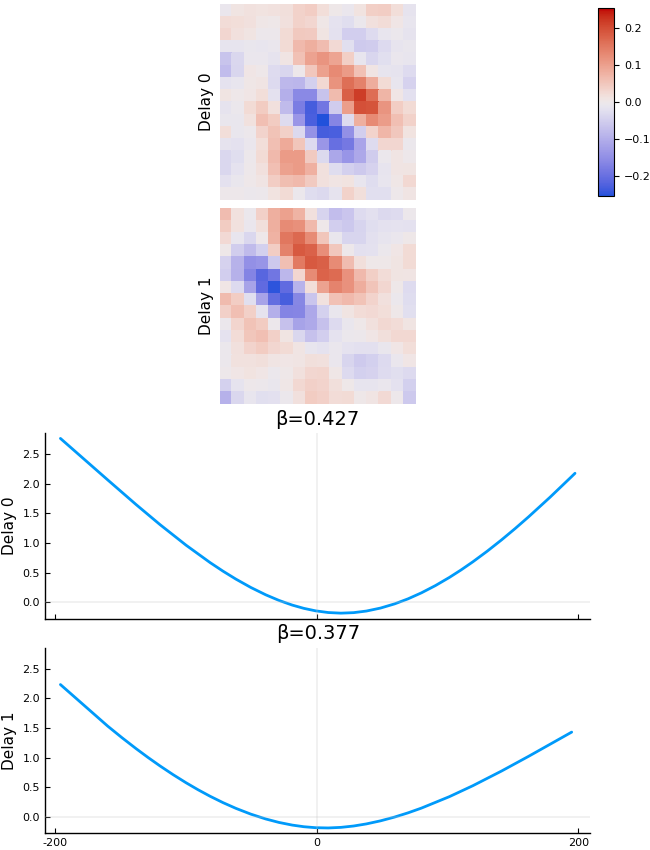

Drop Term: (temporal-1, spatial-1) with β: 0.37697768101178947.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.426614]
New βs: [0.431418]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 10270.623848879244, PenaltyLoss: 98.11857772475221.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.094570324758739
                                 step is λ = 0
New Term 2th iteration. TermLoss: 10261.291281655776, PenaltyLoss: 104.11908655362483.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.3229033089511373
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 8.667223520711127e-5.
Model Loss increased from 10365.044085396714 to 10366.803181923926. Discard the new term, keep the old one.


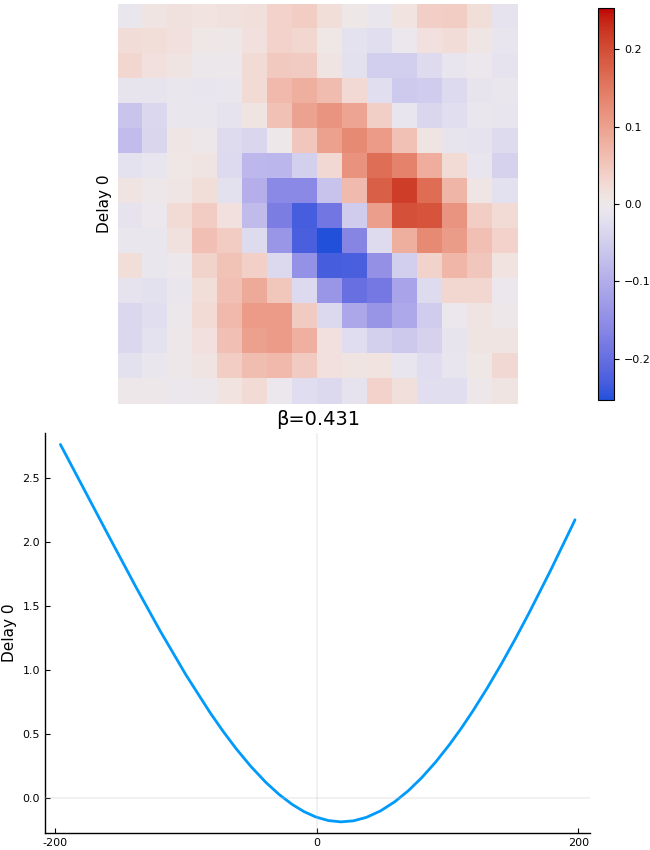

ePPR Models Cross Validation ...


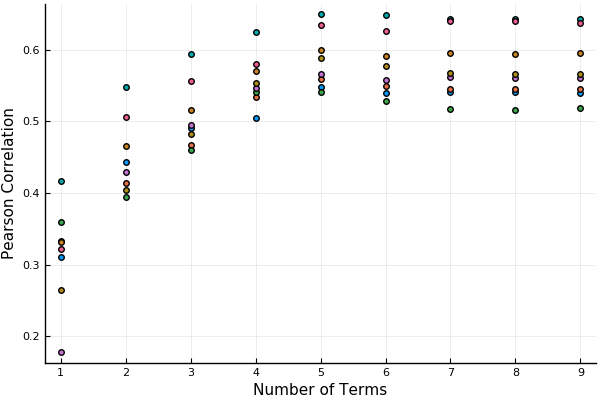

5th model with 5 terms is chosen.
ePPR Model Forward Stepwise ...
Fit Model (Temporal-0, Spatial-1) New Term ...
Fit Model (Temporal-0, Spatial-2) New Term ...
Fit Model (Temporal-1, Spatial-1) New Term ...
Fit Model (Temporal-1, Spatial-2) New Term ...
Fit Model (Temporal-2, Spatial-1) New Term ...
Refit Model βs ...
Old βs: [0.396261, 0.21749, 0.346652, 0.202659, 0.22601]
New βs: [0.366926, 0.247164, 0.324132, 0.227237, 0.277522]
Cross Validated ePPR Done.


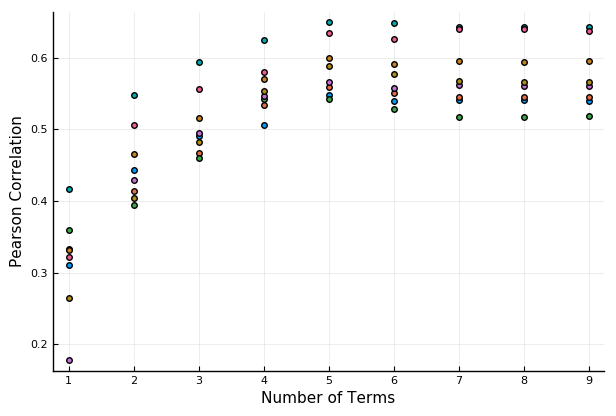

In [129]:
using ePPR
hp=ePPRHyperParams(imagesize...)
hp.nft = [3,3,3]
debug = ePPRDebugOptions(level=DebugVisual)
model,models = epprcv(x,y,hp,debug);

### Final Model

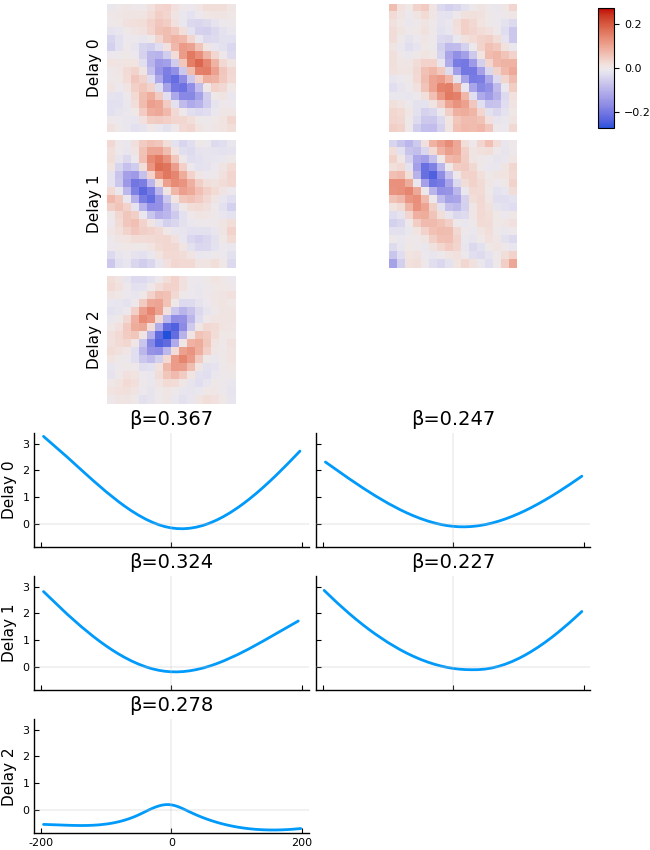

In [130]:
plotmodel(model,hp)

## ePPR with Non-Linear Time Interaction

Cross Validation Data Partition: n = 24000, ntrain = 21120 in 5-fold, ntrainfold = 4224 in 8-fold, ntest = 2880 in 8-fold
Nonlinear Time Interaction, pool x[i-2:i] together ...
ePPR Forward Stepwise ...
Fit (Temporal-0, Spatial-1) New Term ...
Get Initial α ...
New Term 1th iteration. TermLoss: 10486.089699581762, PenaltyLoss: 156.77090671095823.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.2746563991252011
                                 step is λ = 0
New Term 2th iteration. TermLoss: 9640.550806522482, PenaltyLoss: 132.02578049747558.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.7062023292569712
                                 step is λ = 0
New Term 3th iteration. TermLoss: 8775.964617987005, PenaltyLoss: 170.02325382643406.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.4667178408986112
                                 step is λ = 0
New Term 4th iteration. TermLoss: 8157.29956722

New Term 1th iteration. TermLoss: 5884.74553521948, PenaltyLoss: 64.37548814429371.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.7655254463368991
                                 step is λ = 0
New Term 2th iteration. TermLoss: 5854.558420648588, PenaltyLoss: 40.66302523419546.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.6947026395682656
                                 step is λ = 0
New Term 3th iteration. TermLoss: 5847.8100966244165, PenaltyLoss: 39.3515036157919.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.5769656797304226
                                 step is λ = 0
New Term 4th iteration. TermLoss: 5846.38331448029, PenaltyLoss: 39.25392132724007.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.5627191508933422
                                 step is λ = 0
New Term converged in 4 iterations with (lossₒ-lossₙ)/lossₒ = 7.462817096784352e-5.
Re

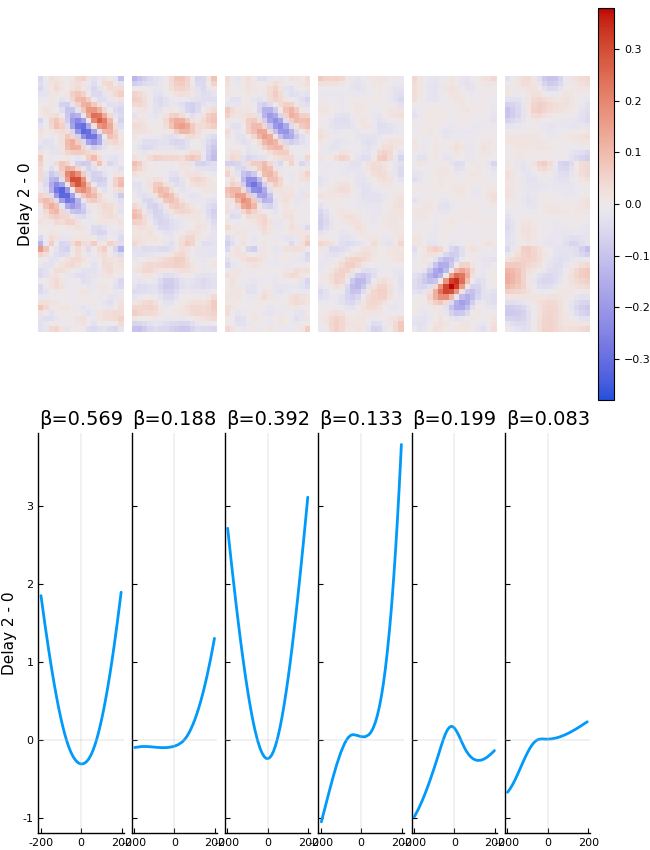

Drop Term: (temporal-0, spatial-6) with β: 0.08282112437569751.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.569042, 0.187753, 0.391973, 0.13304, 0.198775]
New βs: [0.601939, 0.159131, 0.421179, 0.135736, 0.232575]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 5823.046535943877, PenaltyLoss: 212.27205458184082.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9674251211251391
                                 step is λ = 0
New Term 2th iteration. TermLoss: 5821.615104594111, PenaltyLoss: 213.51527009910404.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9804477661958492
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 0.0001854032565236573.
Model Loss increased from 6267.3098823219325 to 6288.370282959902. Discard the new term, keep the old one.
Refit (Temporal-0, Spatial-2) New Term ...
New Term 1th iteration. TermLoss: 5794.77

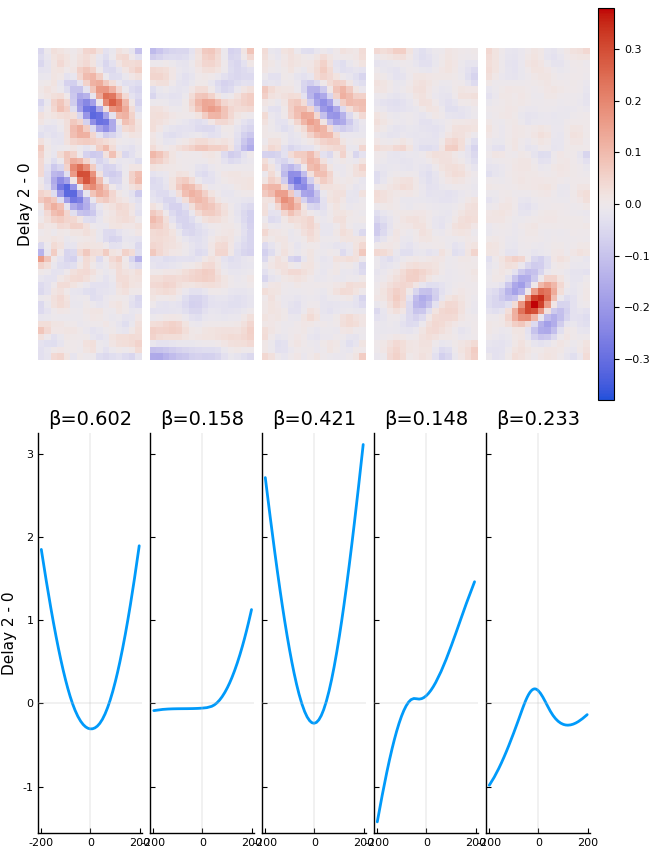

Drop Term: (temporal-0, spatial-4) with β: 0.14793521630732942.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.601939, 0.157649, 0.421179, 0.232575]
New βs: [0.589255, 0.12779, 0.410167, 0.247429]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 5939.755825544922, PenaltyLoss: 212.27205458184082.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9555943568429365
                                 step is λ = 0
New Term 2th iteration. TermLoss: 5926.902214735913, PenaltyLoss: 217.4222659989682.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9611761829638452
                                 step is λ = 0
New Term 3th iteration. TermLoss: 5928.658685271501, PenaltyLoss: 219.5772770485938.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9682178373415623
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.0001

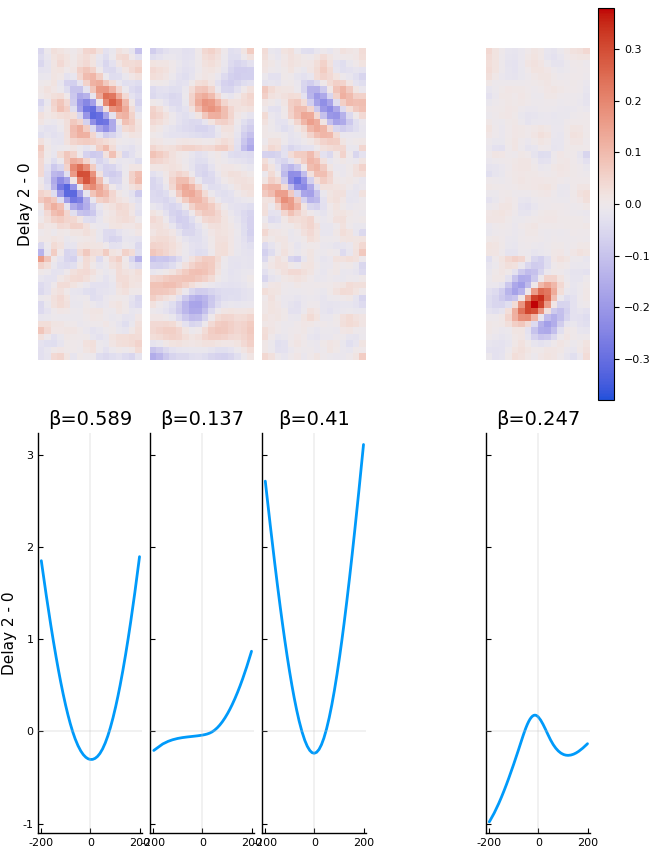

Drop Term: (temporal-0, spatial-2) with β: 0.13710075890841855.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.589255, 0.410167, 0.247429]
New βs: [0.602926, 0.428007, 0.24681]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 6072.722979274849, PenaltyLoss: 212.27205458184082.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9916355157201358
                                 step is λ = 0
New Term 2th iteration. TermLoss: 6061.020537855273, PenaltyLoss: 216.8357027020794.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9765544135460438
                                 step is λ = 0
New Term 3th iteration. TermLoss: 6062.806136759805, PenaltyLoss: 219.3082444147495.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9738563434260744
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.00018464230004185096.
Mo

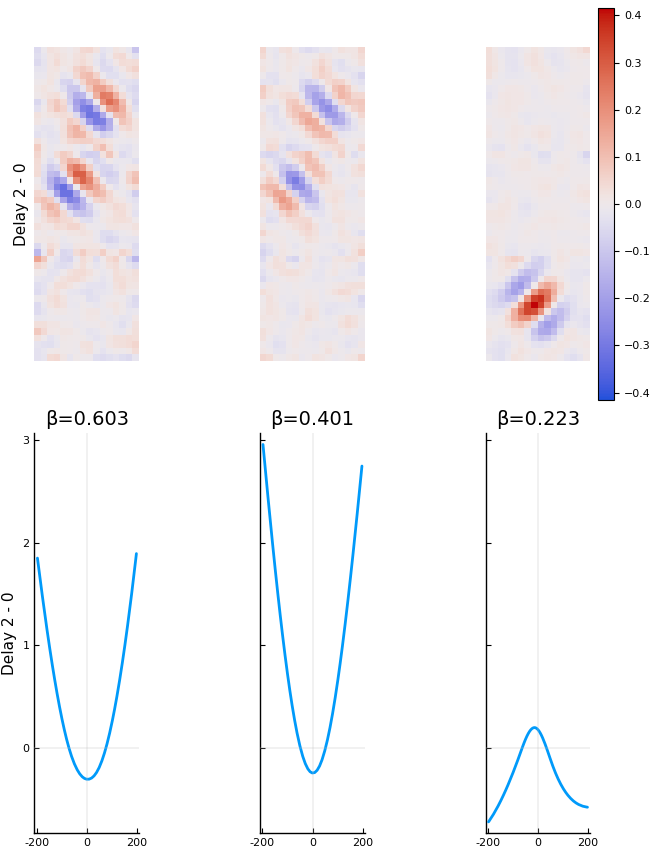

Drop Term: (temporal-0, spatial-5) with β: 0.22281073835644244.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.602926, 0.401369]
New βs: [0.604304, 0.430011]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 6542.290471908094, PenaltyLoss: 212.27205458184082.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.96931542261662
                                 step is λ = 0
New Term 2th iteration. TermLoss: 6516.906184903098, PenaltyLoss: 227.9414192730401.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9215985732620795
                                 step is λ = 0
New Term 3th iteration. TermLoss: 6518.376508251668, PenaltyLoss: 230.49824947291006.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.964079742508162
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.00017073173411040376.
Model Loss increased fr

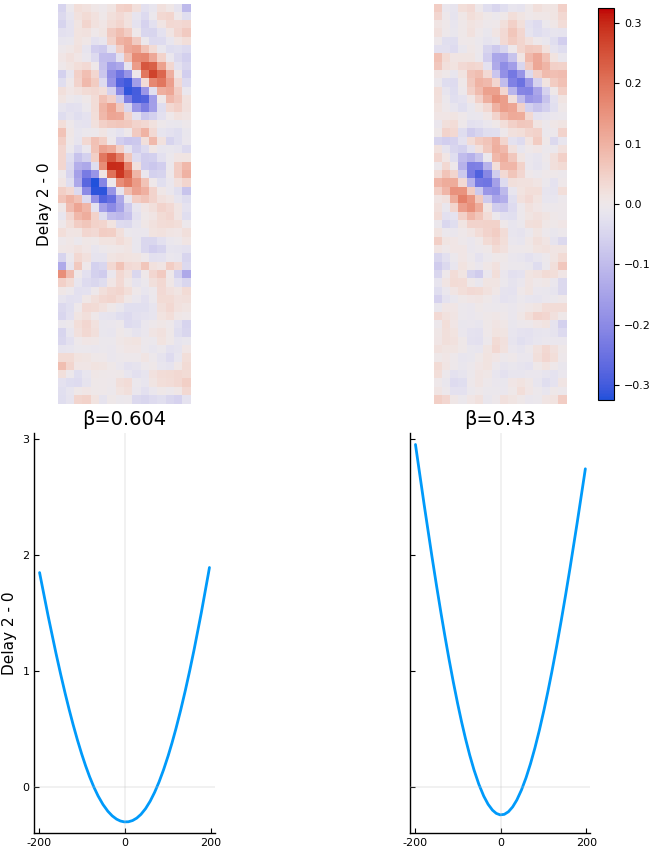

Drop Term: (temporal-0, spatial-3) with β: 0.43001117439717856.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.604304]
New βs: [0.668613]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 8087.376402214405, PenaltyLoss: 212.27205458184082.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.038270463958484
                                 step is λ = 0
New Term 2th iteration. TermLoss: 8008.588565973064, PenaltyLoss: 238.0821748413653.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.0474495118929896
                                 step is λ = 0
New Term 3th iteration. TermLoss: 8009.379732978903, PenaltyLoss: 241.15369842797688.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.0466664481599053
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.00023596737452065273.


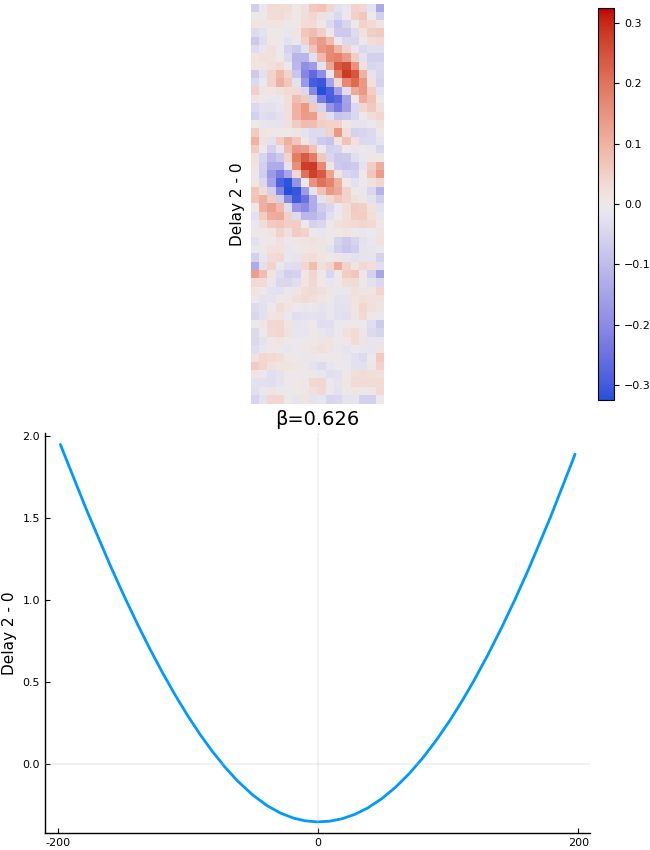

ePPR Models Cross Validation ...


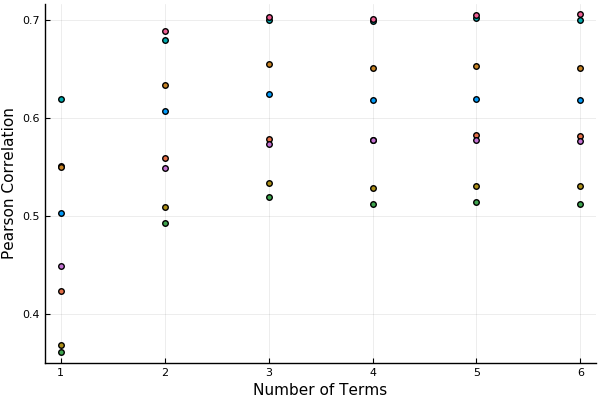

3th model with 3 terms is chosen.
ePPR Model Forward Stepwise ...
Fit Model (Temporal-0, Spatial-1) New Term ...
Fit Model (Temporal-0, Spatial-2) New Term ...
Fit Model (Temporal-0, Spatial-3) New Term ...
Refit Model βs ...
Old βs: [0.619553, 0.393692, 0.222972]
New βs: [0.599627, 0.431602, 0.267254]
Cross Validated ePPR Done.


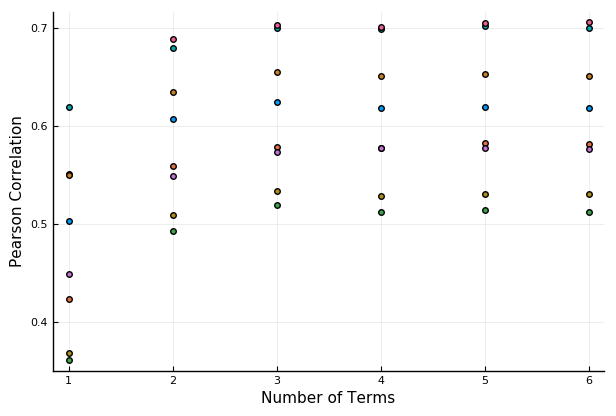

In [127]:
using ePPR
hp=ePPRHyperParams(imagesize...,ndelay=3)
hp.lambda = 15
hp.nft = [6]
debug = ePPRDebugOptions(level=DebugVisual)
model,models = epprcv(x,y,hp,debug);

### Final Model

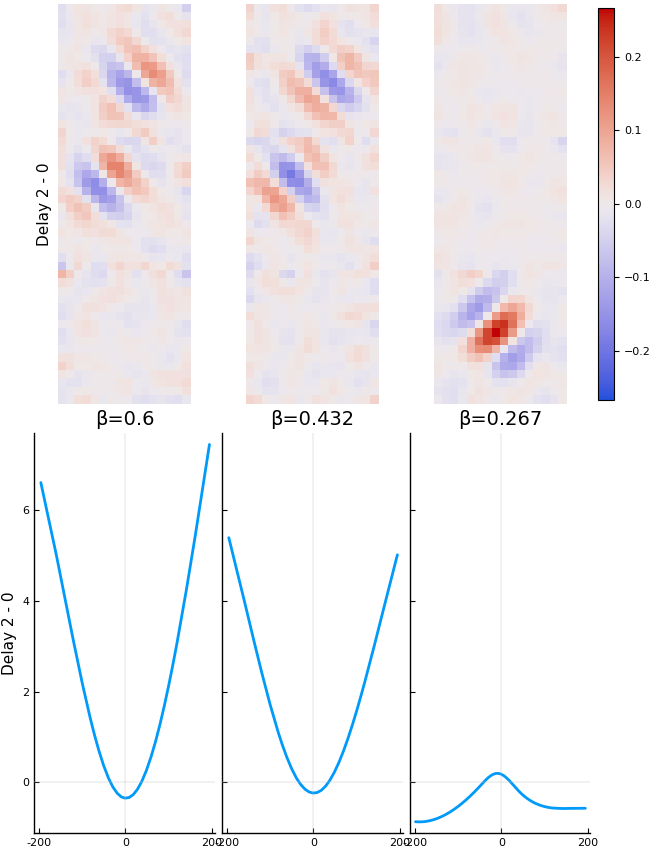

In [128]:
plotmodel(model,hp)

## Data Recorded from an Anesthetized Cat
#### X: Natural Images each present 40ms
#### Y1: Neuron Spike Sum
#### Y2: Neuron Spike Sum

In [131]:
using Revise,FileIO
data=load("./data.jld");x=data["x"];y1=data["y1"];y2=data["y2"];imagesize=(12,12);

Widget{:slider,Int64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64} with 1 listeners. Value:
0,:value=>Observable{Int64} with 4 listeners. Value:
12000), Observable{Int64} with 4 listeners. Value:
12000, Scope("knockout-component-83b02a47-c55a-4971-ac53-ef3bbaa5586b", Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-left")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>24000,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-center")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row-right")), 1)], Dict{Symbol,Any}(:attributes=>Dict("class"=>"interact-flex-row")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"value"=>(Observable{Int64} with 4 listeners. Value:
12000, nothing)), Set(String[]), nothing, Any["knockout"=>"C:\\Users\\Alex\\.julia\\packages\\Knockout\\JIqpG\\src\\..\\assets\\knockout.js", "knockout_punches"=>"C:\\Users\\Alex\\.julia\\packages\\Knockout\\JIqpG\\src\\..\\assets\\knockout_punches.js", "C:\\Users\\Alex\\.julia\\packages\\InteractBase\\3SqBl\\src\\..\\assets\\all.js", "C:\\Users\\Alex\\.julia\\packages\\InteractBase\\3SqBl\\src\\..\\assets\\style.css", "C:\\Users\\Alex\\.julia\\packages\\InteractBulma\\Ohu5Y\\src\\..\\assets\\main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":12000}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"knockout-component-83b02a47-c55a-4971-ac53-ef3bbaa5586b\",\"id\":\"ob_22\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"changes\"]=false}),self),this[\"value\"].subscribe((function (val){!(this.valueFromJulia[\"value\"]) ? (WebIO.setval({\"name\":\"value\",\"scope\":\"knockout-component-83b02a47-c55a-4971-ac53-ef3bbaa5586b\",\"id\":\"ob_21\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"value\"]=false}),self)]\n    

Observable{Any} with 0 listeners. Value:
Gray{Float64}[Gray{Float64}(0.537255) Gray{Float64}(0.360784) … Gray{Float64}(0.298039) Gray{Float64}(0.329412); Gray{Float64}(0.360784) Gray{Float64}(0.329412) … Gray{Float64}(0.74902) Gray{Float64}(0.74902); … ; Gray{Float64}(0.270588) Gray{Float64}(0.329412) … Gray{Float64}(0.419608) Gray{Float64}(0.388235); Gray{Float64}(0.180392) Gray{Float64}(0.239216) … Gray{Float64}(0.388235) Gray{Float64}(0.388235)]
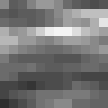
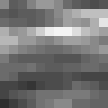

Observable{Any} with 0 listeners. Value:
0

Observable{Any} with 0 listeners. Value:
29

In [132]:
using Interact,Images
i = slider(1:size(x,1))
xvalue = map(j->colorview(Gray,reshape(x[j,:]/255,imagesize...)),observe(i))
y1value = map(j->y1[j],observe(i))
y2value = map(j->y2[j],observe(i))
display.([i,xvalue,y1value,y2value]);

## ePPR with Linear Time Interaction

Cross Validation Data Partition: n = 24000, ntrain = 21120 in 5-fold, ntrainfold = 4224 in 8-fold, ntest = 2880 in 8-fold
ePPR Forward Stepwise ...
Fit (Temporal-0, Spatial-1) New Term ...
Get Initial α ...
New Term 1th iteration. TermLoss: 14851.947419437352, PenaltyLoss: 181.96311825106233.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.8529997447010355
                                 step is λ = 0
New Term 2th iteration. TermLoss: 14812.447998330088, PenaltyLoss: 97.6368017071177.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9488970950560949
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 0.0009320423598478276.
Fit (Temporal-0, Spatial-2) New Term ...
Get Initial α ...
New Term 1th iteration. TermLoss: 14766.336254007132, PenaltyLoss: 404.13972483026134.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9783461154087192
     

New Term 2th iteration. TermLoss: 12229.707015747466, PenaltyLoss: 74.87870476872268.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9639660136283427
                                 step is λ = 0
New Term 3th iteration. TermLoss: 12218.026688479284, PenaltyLoss: 71.78683224595186.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9583040266668174
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.0002759593634929155.
Refit (Temporal-0, Spatial-2) New Term ...
New Term 1th iteration. TermLoss: 12202.766044119882, PenaltyLoss: 28.672841834288.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9749136550126493
                                 step is λ = 0
New Term 2th iteration. TermLoss: 12198.14455900501, PenaltyLoss: 28.263880331776804.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9854543722799284
 

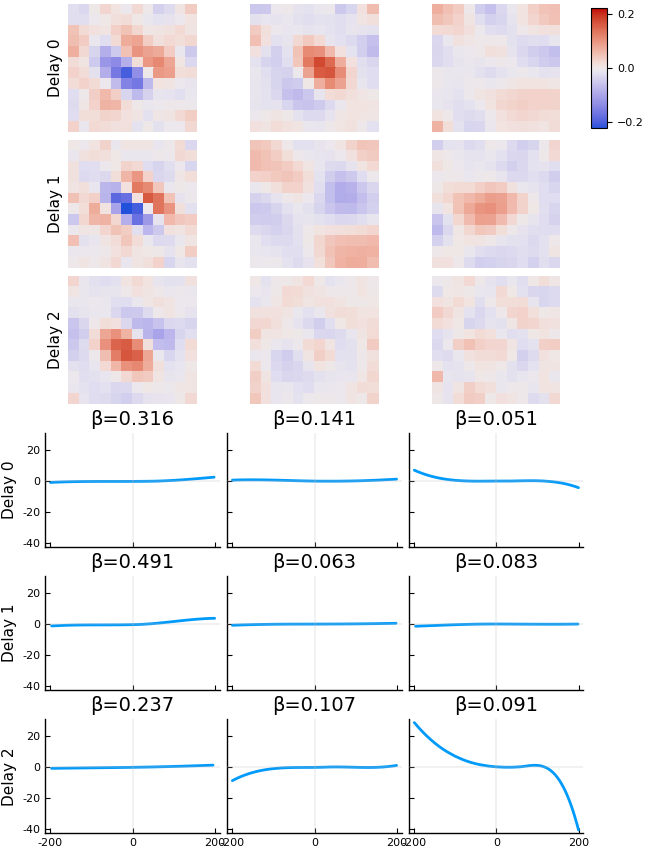

Drop Term: (temporal-0, spatial-3) with β: 0.050858714318998556.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.316191, 0.1406, 0.49072, 0.0632445, 0.0833577, 0.236624, 0.107329, 0.0908805]
New βs: [0.320354, 0.152494, 0.512647, 0.0754508, 0.0975637, 0.249738, 0.118065, 0.100427]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 12011.39949929645, PenaltyLoss: 68.44810366064975.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.0494077327766913
                                 step is λ = 0
New Term 2th iteration. TermLoss: 11996.901417687275, PenaltyLoss: 66.31910117985016.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9737187707398735
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 0.00021502117459327444.
Refit (Temporal-0, Spatial-2) New Term ...
New Term 1th iteration. TermLoss: 11995.808956402947, PenaltyLoss: 29.02193462690822

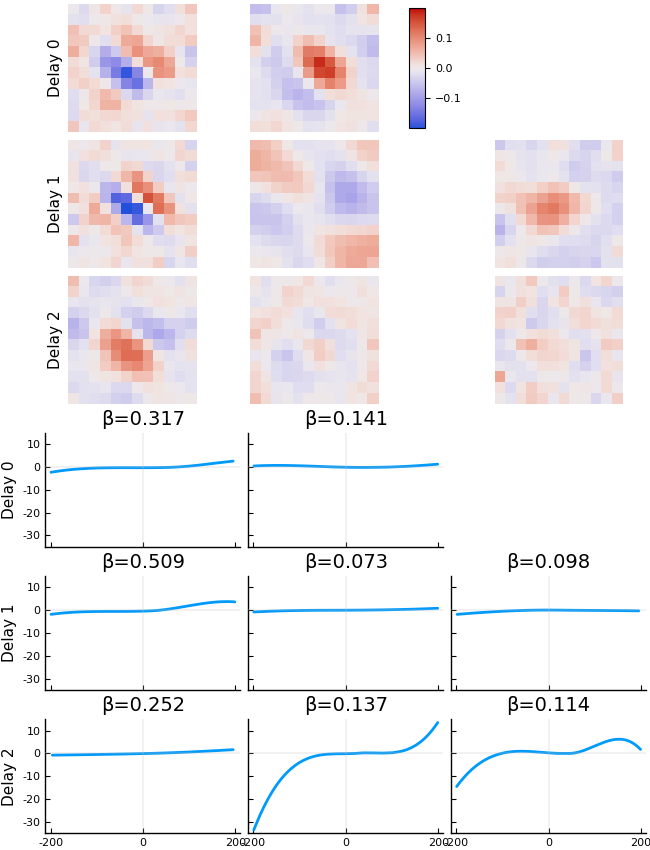

Drop Term: (temporal-1, spatial-2) with β: 0.07336646185331952.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.316969, 0.141329, 0.508771, 0.0979159, 0.251738, 0.136751, 0.11448]
New βs: [0.324841, 0.155142, 0.510737, 0.0974173, 0.2632, 0.148353, 0.131234]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 11927.876089911964, PenaltyLoss: 63.5053782392693.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9712903187452894
                                 step is λ = 0
New Term 2th iteration. TermLoss: 11921.62573993617, PenaltyLoss: 61.07607046711447.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9770140854559907
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 0.00014077549934525315.
Refit (Temporal-0, Spatial-2) New Term ...
New Term 1th iteration. TermLoss: 11921.490491702849, PenaltyLoss: 30.22474485406551.
NewtonTrustRegion 1th i

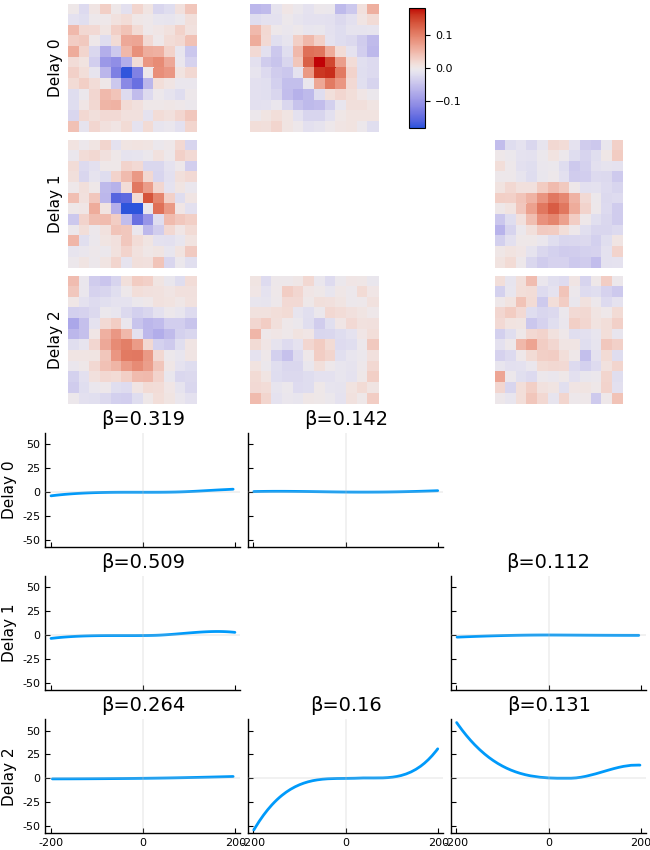

Drop Term: (temporal-1, spatial-3) with β: 0.11240633112474374.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.319385, 0.142296, 0.509358, 0.264076, 0.160196, 0.131216]
New βs: [0.326974, 0.157689, 0.484656, 0.278416, 0.175094, 0.152254]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 11920.79770454578, PenaltyLoss: 59.05259687606452.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9901457874223226
                                 step is λ = 0
New Term 2th iteration. TermLoss: 11914.726012056894, PenaltyLoss: 57.90397759972949.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9785220950740622
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 0.0001014742256029331.
Refit (Temporal-0, Spatial-2) New Term ...
New Term 1th iteration. TermLoss: 11915.701314626524, PenaltyLoss: 31.114425185342654.
NewtonTrustRegion 1th iteration, r = 1.0


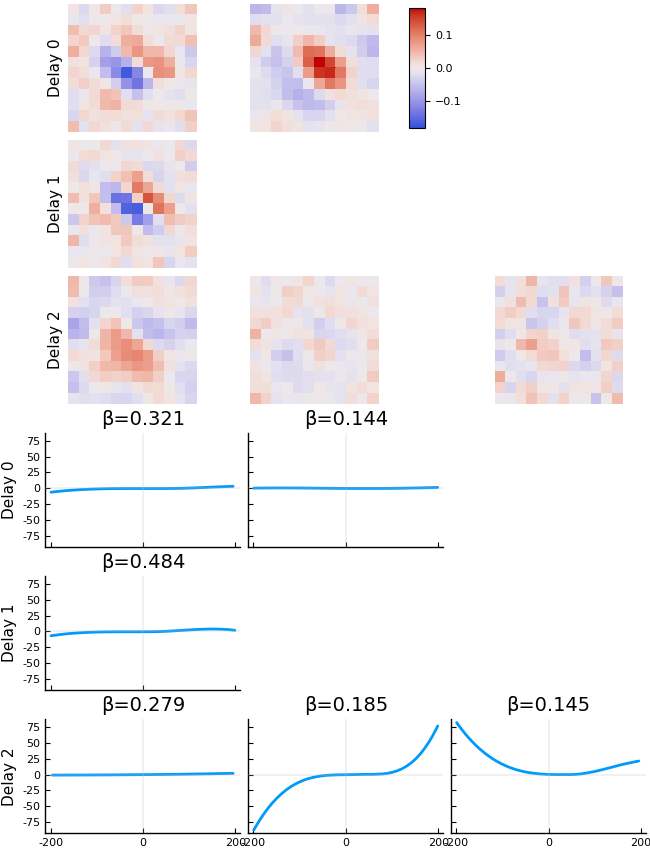

Drop Term: (temporal-0, spatial-2) with β: 0.14432006417808851.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.320973, 0.483981, 0.279109, 0.184735, 0.145347]
New βs: [0.322193, 0.491543, 0.291354, 0.198028, 0.169248]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 12030.271746361526, PenaltyLoss: 56.326632722278866.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.044789658470463
                                 step is λ = 0
New Term 2th iteration. TermLoss: 12021.636048665709, PenaltyLoss: 56.355121775159304.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.055200387100959
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 9.388002492239774e-5.
Refit (Temporal-1, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 12016.946520005364, PenaltyLoss: 104.37071622712735.
NewtonTrustRegion 1th iteration, r = 1.0
                    

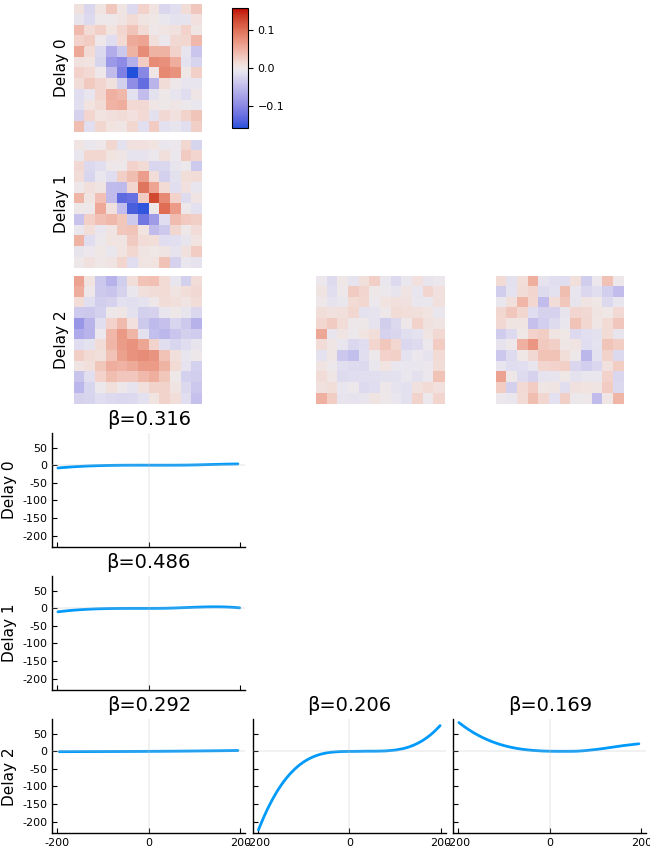

Drop Term: (temporal-2, spatial-3) with β: 0.16924754320539612.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.316469, 0.485545, 0.292328, 0.206333]
New βs: [0.325099, 0.495213, 0.313183, 0.203972]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 12263.346962038946, PenaltyLoss: 55.27000892808423.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.021136447314735
                                 step is λ = 0
New Term 2th iteration. TermLoss: 12258.10465568845, PenaltyLoss: 54.811884664693395.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.0346414225109213
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 6.710154261941471e-5.
Refit (Temporal-1, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 12255.066578478201, PenaltyLoss: 95.27453759419089.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.003

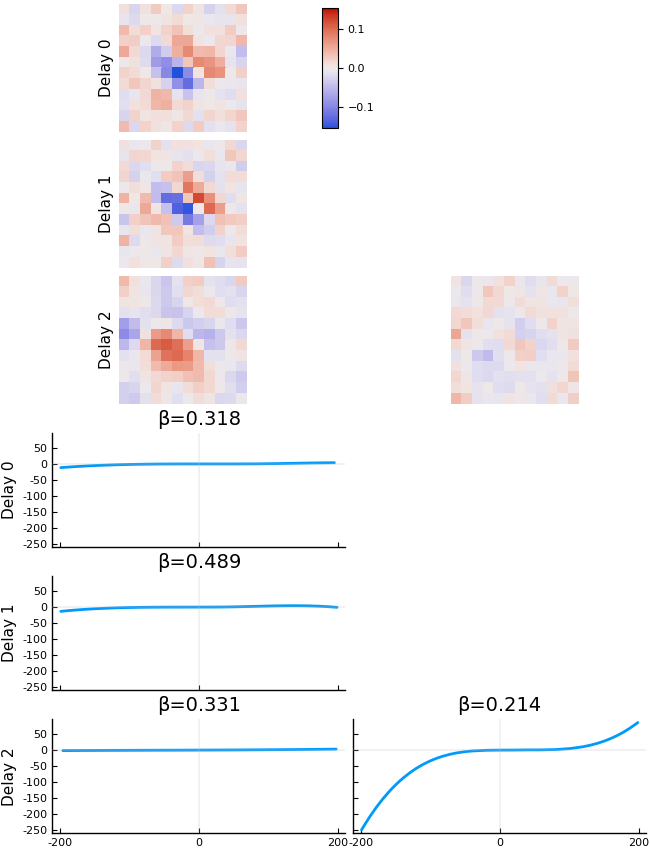

Drop Term: (temporal-2, spatial-2) with β: 0.2136915751126535.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.318014, 0.48901, 0.331004]
New βs: [0.325797, 0.495358, 0.182454]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 12352.018327073878, PenaltyLoss: 54.043682076715555.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9929835278936647
                                 step is λ = 0
New Term 2th iteration. TermLoss: 12348.151031115427, PenaltyLoss: 53.11258216951934.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9920035719827429
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 4.7177221130104854e-5.
Refit (Temporal-1, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 12344.866252104679, PenaltyLoss: 89.79659940278334.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9904112056742438
     

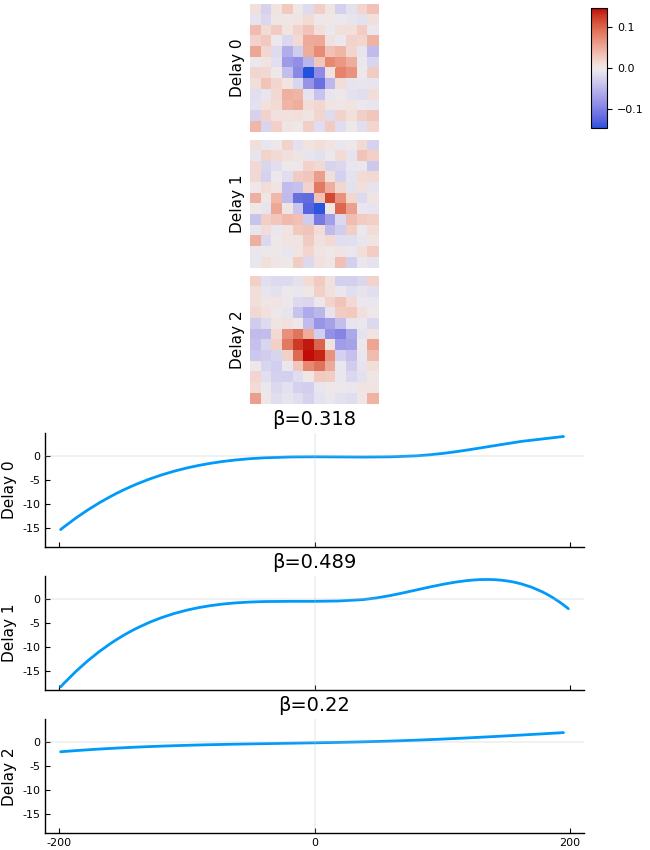

Drop Term: (temporal-2, spatial-1) with β: 0.21972546387669756.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.318254, 0.489023]
New βs: [0.328325, 0.496342]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 12617.682428559174, PenaltyLoss: 52.21599875307982.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.0613731016553296
                                 step is λ = 0
New Term 2th iteration. TermLoss: 12613.251091178778, PenaltyLoss: 51.922943211187295.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.0540591469054432
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 4.4332046480278836e-5.
Refit (Temporal-1, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 12610.657533333857, PenaltyLoss: 86.14106018687445.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9554877673328543
                       

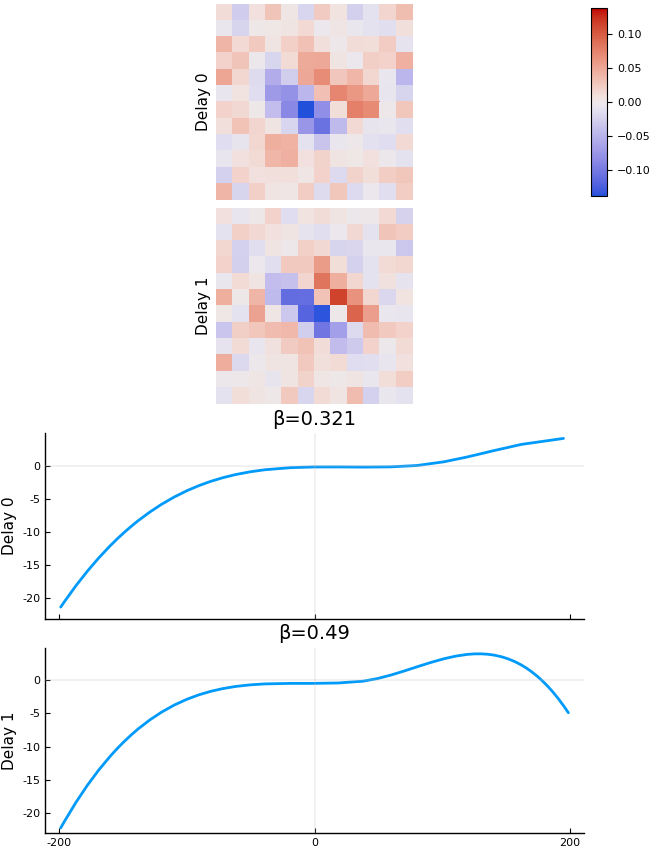

Drop Term: (temporal-0, spatial-1) with β: 0.32065300309345723.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [0.489556]
New βs: [0.500318]
Refit (Temporal-1, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 13521.771349587101, PenaltyLoss: 80.99679869863324.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9974774535232948
                                 step is λ = 0
New Term 2th iteration. TermLoss: 13509.69366691234, PenaltyLoss: 83.6176073624196.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.9848502392660837
                                 step is λ = 0
New Term converged in 2 iterations with (lossₒ-lossₙ)/lossₒ = 6.901656745068436e-5.


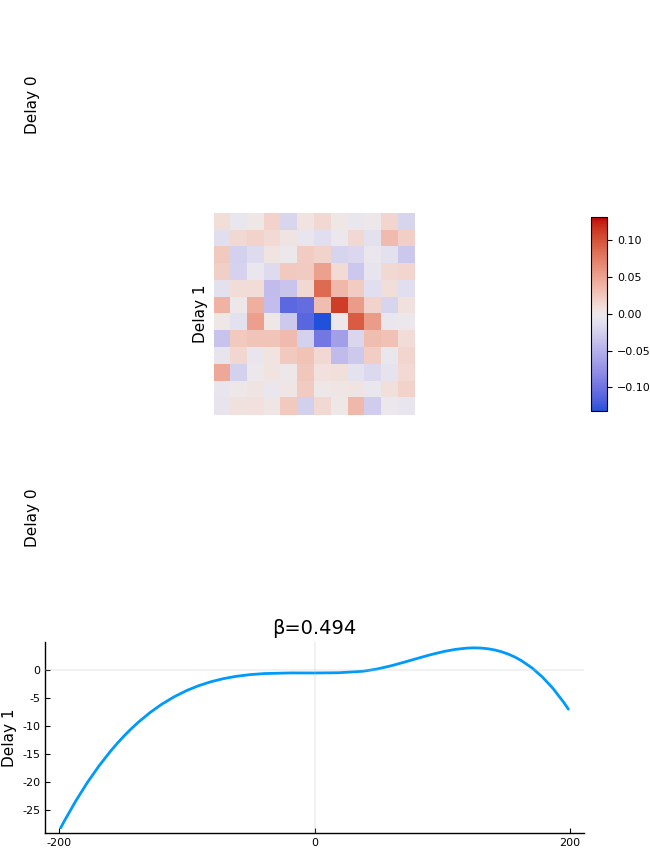

ePPR Models Cross Validation ...


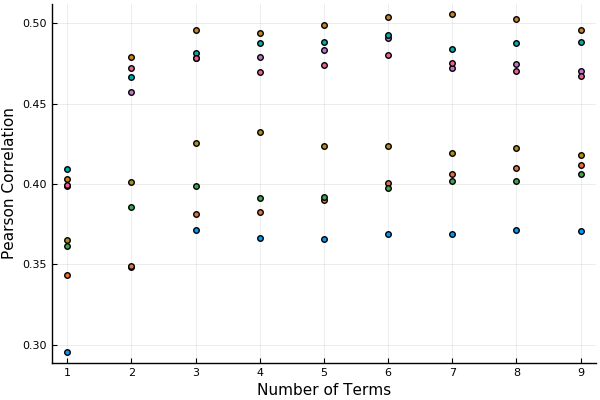

3th model with 3 terms is chosen.
ePPR Model Forward Stepwise ...
Fit Model (Temporal-0, Spatial-1) New Term ...
Fit Model (Temporal-1, Spatial-1) New Term ...
Fit Model (Temporal-2, Spatial-1) New Term ...
Refit Model βs ...
Old βs: [0.324513, 0.489129, 0.221247]
New βs: [0.327602, 0.497062, 0.222304]
Cross Validated ePPR Done.


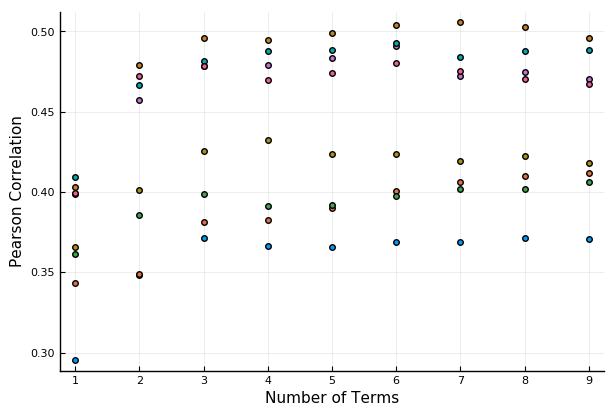

In [135]:
using ePPR
hp=ePPRHyperParams(imagesize...)
debug = ePPRDebugOptions(level=DebugVisual)
model,models = epprcv(x,y1,hp,debug);

### Final Model

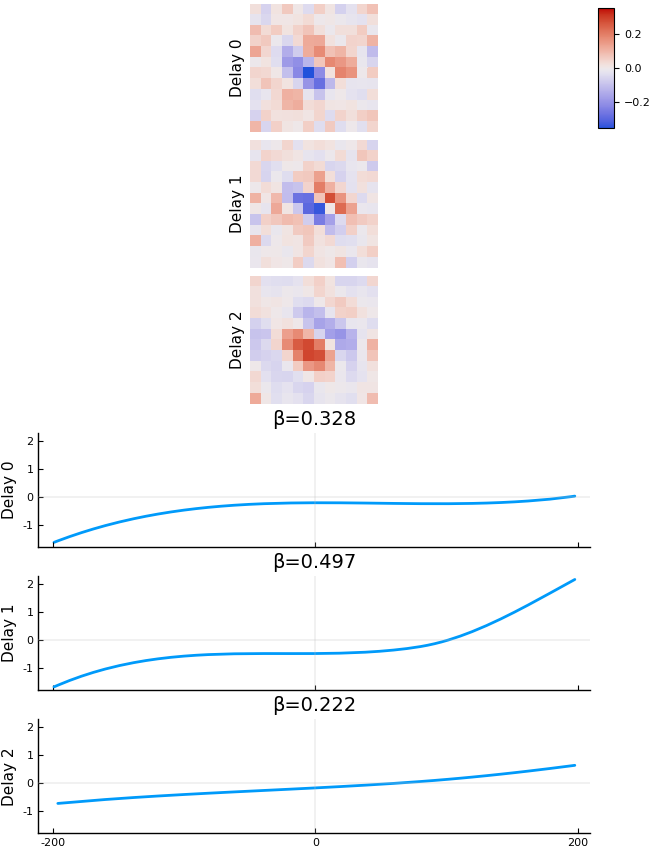

In [136]:
plotmodel(model,hp)

## ePPR with Non-Linear Time Interaction

Cross Validation Data Partition: n = 24000, ntrain = 21120 in 5-fold, ntrainfold = 4224 in 8-fold, ntest = 2880 in 8-fold
Nonlinear Time Interaction, pool x[i-2:i] together ...
ePPR Forward Stepwise ...
Fit (Temporal-0, Spatial-1) New Term ...
Get Initial α ...
New Term 1th iteration. TermLoss: 368957.89265868446, PenaltyLoss: 229.46795922627314.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 1.1266285824926252
                                 step is easy
New Term 2th iteration. TermLoss: 341718.74006828177, PenaltyLoss: 1841.8225642217003.
NewtonTrustRegion 1th iteration, r = 2.0
                                 ρ = 1.3308714790797245
                                 step is easy
New Term 3th iteration. TermLoss: 339166.87013639277, PenaltyLoss: 1879.0594801184002.
NewtonTrustRegion 1th iteration, r = 4.0
                                 ρ = 1.4769769145771632
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-

                                 ρ = 0.8688191468673541
                                 step is λ = 0
New Term 2th iteration. TermLoss: 224694.72844582028, PenaltyLoss: 1416.5104304257013.
NewtonTrustRegion 1th iteration, r = 8.0
                                 ρ = 0.6291363642621944
                                 step is λ = 0
New Term 3th iteration. TermLoss: 224618.96203739836, PenaltyLoss: 1423.4374820559212.
NewtonTrustRegion 1th iteration, r = 8.0
                                 ρ = 0.4847566989012065
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 5.259720998392771e-5.
Refit (Temporal-0, Spatial-5) New Term ...
New Term 1th iteration. TermLoss: 223909.94930835074, PenaltyLoss: 460.55473892522724.
NewtonTrustRegion 1th iteration, r = 1.0
                                 ρ = 0.7587796383802046
                                 step is easy
New Term 2th iteration. TermLoss: 223080.82609115203, PenaltyLoss: 395.9651628

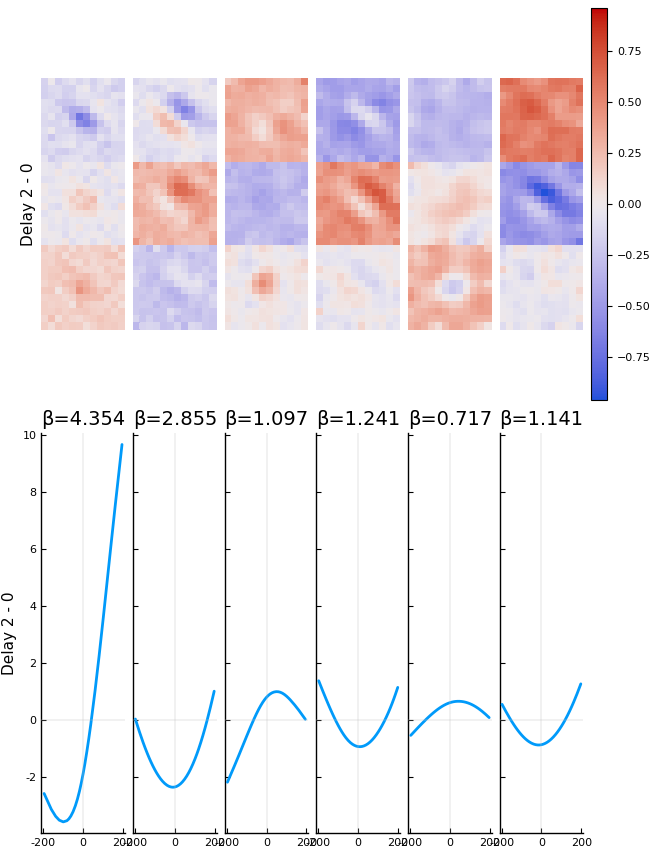

Drop Term: (temporal-0, spatial-5) with β: 0.7174380426448285.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [4.35401, 2.8549, 1.09724, 1.2406, 1.14072]
New βs: [4.4492, 3.00903, 1.12599, 1.31604, 1.20506]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 225750.4395624528, PenaltyLoss: 1680.7579151943792.
NewtonTrustRegion 1th iteration, r = 4.0
                                 ρ = 0.936763855617666
                                 step is λ = 0
New Term 2th iteration. TermLoss: 225197.76017831397, PenaltyLoss: 1678.793761311324.
NewtonTrustRegion 1th iteration, r = 4.0
                                 ρ = 0.9953518637952944
                                 step is λ = 0
New Term 3th iteration. TermLoss: 225272.71609997758, PenaltyLoss: 1706.7821044225368.
NewtonTrustRegion 1th iteration, r = 4.0
                                 ρ = 0.9874592779394827
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ

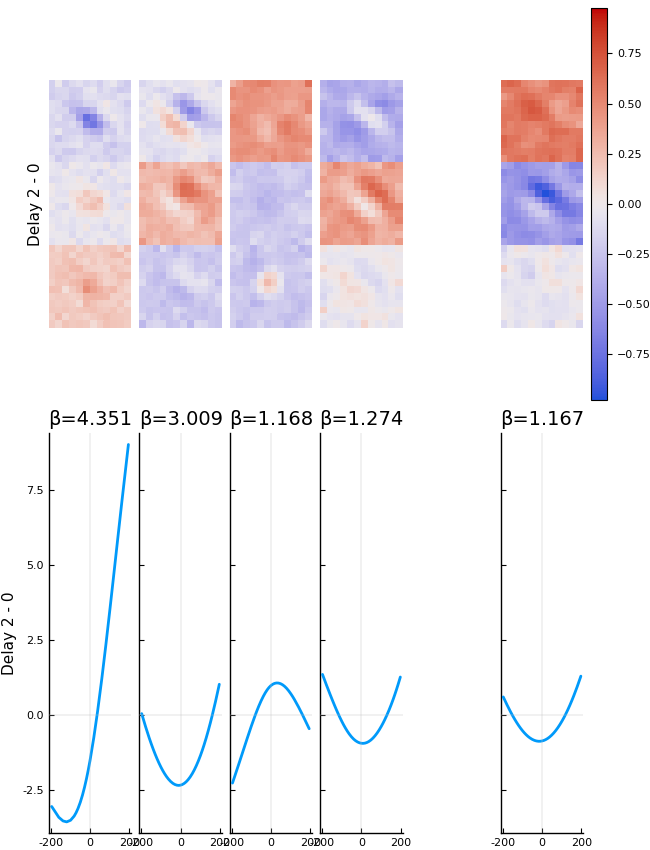

Drop Term: (temporal-0, spatial-6) with β: 1.166758322410213.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [4.35053, 3.00903, 1.1677, 1.27449]
New βs: [4.55062, 3.01096, 1.21844, 1.39283]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 236519.86191917598, PenaltyLoss: 1737.8481618105777.
NewtonTrustRegion 1th iteration, r = 4.0
                                 ρ = 0.9876344395983897
                                 step is λ = 0
New Term 2th iteration. TermLoss: 236262.6423969081, PenaltyLoss: 1815.4383330476621.
NewtonTrustRegion 1th iteration, r = 4.0
                                 ρ = 1.0023875790773995
                                 step is λ = 0
New Term 3th iteration. TermLoss: 236336.3866135779, PenaltyLoss: 1855.034834247721.
NewtonTrustRegion 1th iteration, r = 4.0
                                 ρ = 0.9945263846257079
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.000520592328

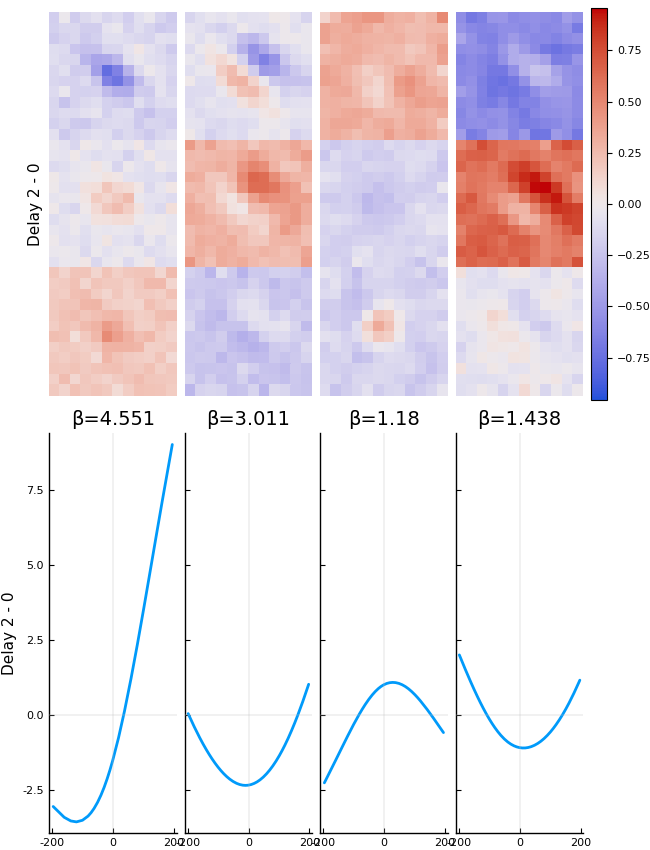

Drop Term: (temporal-0, spatial-3) with β: 1.1795001442943194.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [4.55062, 3.01096, 1.43783]
New βs: [4.61482, 3.03191, 1.53976]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 245824.86931042085, PenaltyLoss: 1737.8481618105777.
NewtonTrustRegion 1th iteration, r = 4.0
                                 ρ = 0.8599023227904262
                                 step is λ = 0
New Term 2th iteration. TermLoss: 245395.31073013972, PenaltyLoss: 1780.4074438218481.
NewtonTrustRegion 1th iteration, r = 4.0
                                 ρ = 1.0276845078834982
                                 step is λ = 0
New Term 3th iteration. TermLoss: 245458.58566576842, PenaltyLoss: 1809.8370214355036.
NewtonTrustRegion 1th iteration, r = 4.0
                                 ρ = 0.9857706329371212
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.0004945719268232482.
Mode

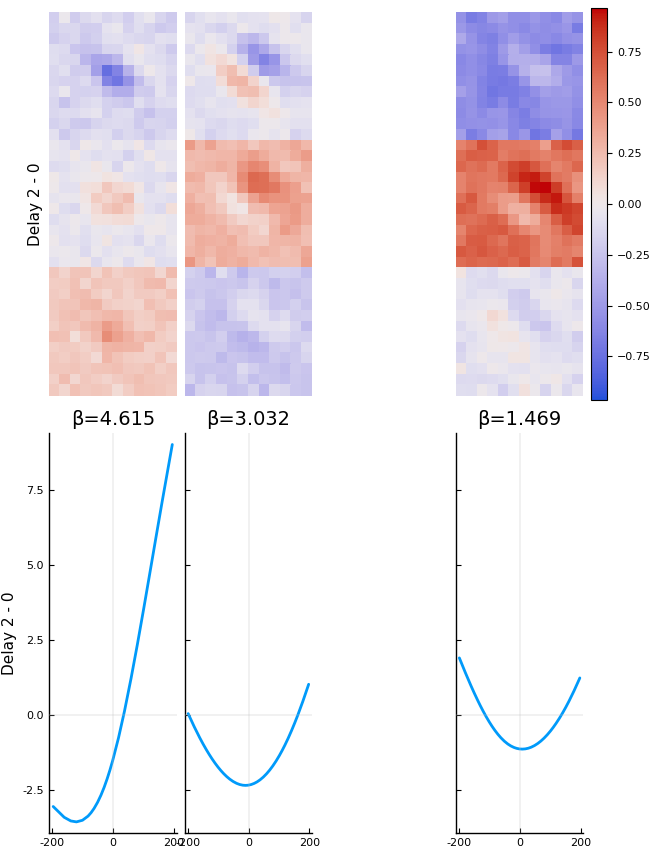

Drop Term: (temporal-0, spatial-4) with β: 1.4692443624963745.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [4.61482, 3.03191]
New βs: [4.58779, 3.02844]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 265697.748489044, PenaltyLoss: 1737.8481618105777.
NewtonTrustRegion 1th iteration, r = 4.0
                                 ρ = 0.9205821016835409
                                 step is λ = 0
New Term 2th iteration. TermLoss: 264861.3991215456, PenaltyLoss: 1916.0814934676469.
NewtonTrustRegion 1th iteration, r = 4.0
                                 ρ = 1.0387861818282236
                                 step is λ = 0
New Term 3th iteration. TermLoss: 264914.0515481425, PenaltyLoss: 1956.2431755997834.
NewtonTrustRegion 1th iteration, r = 4.0
                                 ρ = 0.9922575592234868
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.00045703096158003953.
Refit (Temporal-0, Spatia

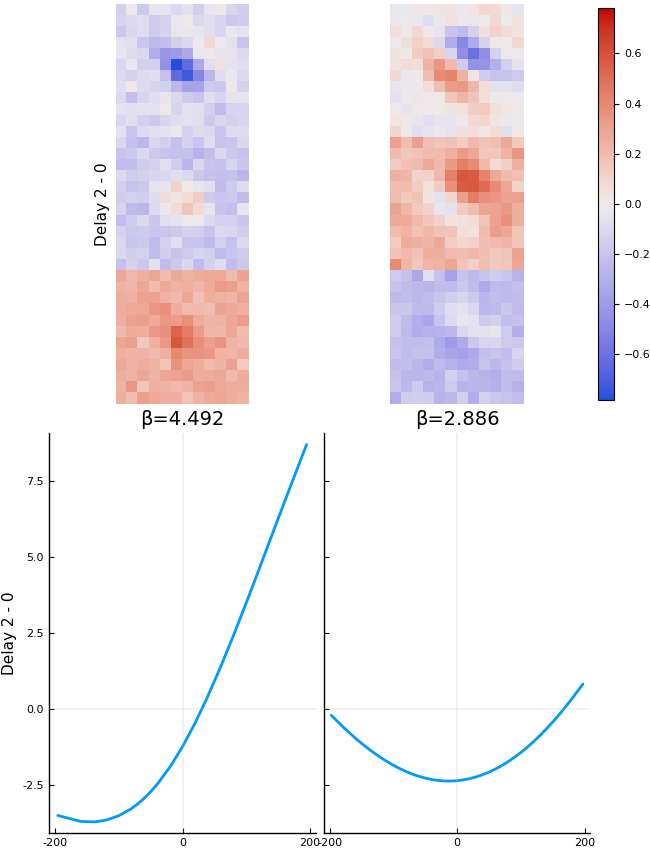

Drop Term: (temporal-0, spatial-2) with β: 2.8860152970337962.
ePPR Model Refit ...
Refit Model βs ...
Old βs: [4.49202]
New βs: [4.54199]
Refit (Temporal-0, Spatial-1) New Term ...
New Term 1th iteration. TermLoss: 342075.67328794143, PenaltyLoss: 1985.7993744273194.
NewtonTrustRegion 1th iteration, r = 4.0
                                 ρ = 1.0978433471855664
                                 step is λ = 0
New Term 2th iteration. TermLoss: 339742.39186153386, PenaltyLoss: 2285.643912679847.
NewtonTrustRegion 1th iteration, r = 4.0
                                 ρ = 1.3091177573761954
                                 step is λ = 0
New Term 3th iteration. TermLoss: 339629.751124415, PenaltyLoss: 2341.8024789538467.
NewtonTrustRegion 1th iteration, r = 4.0
                                 ρ = 1.2065819042265093
                                 step is λ = 0
New Term converged in 3 iterations with (lossₒ-lossₙ)/lossₒ = 0.0005497901015497282.


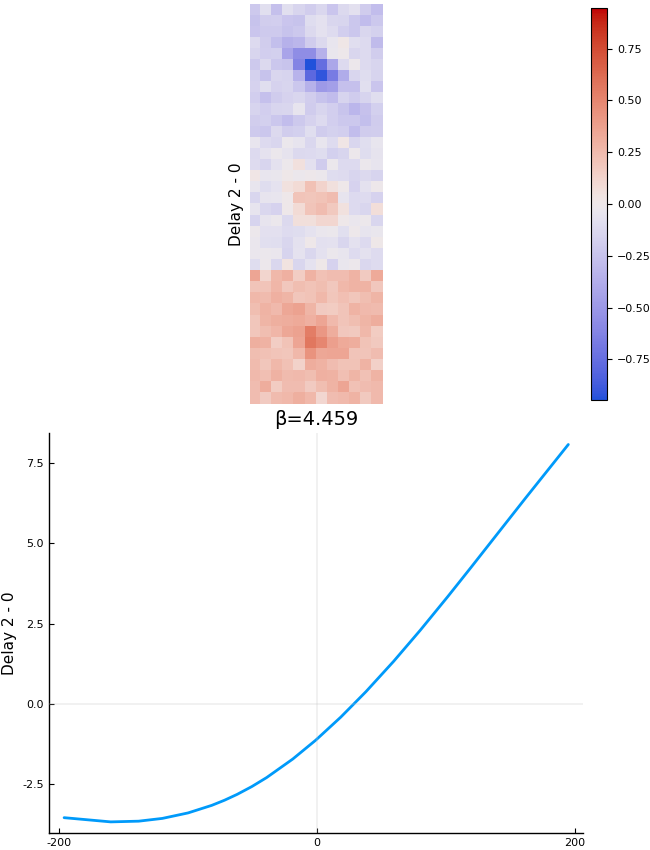

ePPR Models Cross Validation ...


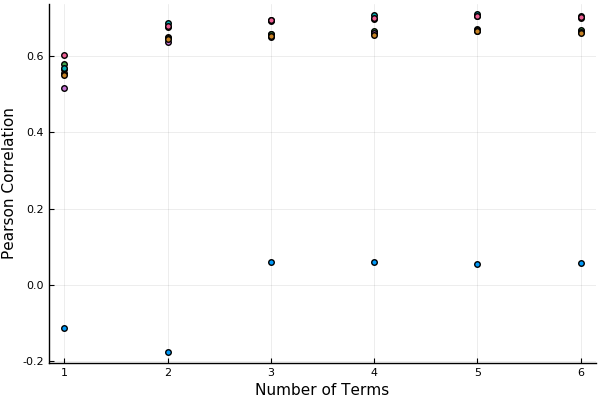

5th model with 5 terms is chosen.
ePPR Model Forward Stepwise ...
Fit Model (Temporal-0, Spatial-1) New Term ...
Fit Model (Temporal-0, Spatial-2) New Term ...
Fit Model (Temporal-0, Spatial-3) New Term ...
Fit Model (Temporal-0, Spatial-4) New Term ...
Fit Model (Temporal-0, Spatial-5) New Term ...
Refit Model βs ...
Old βs: [4.42625, 2.86394, 1.21732, 1.2863, 1.14951]
New βs: [4.47253, 3.02514, 1.22958, 1.31375, 1.22176]
Cross Validated ePPR Done.


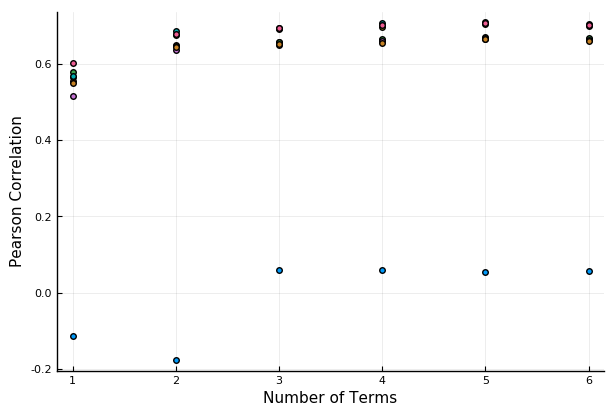

In [137]:
hp=ePPRHyperParams(imagesize...,ndelay=3)
hp.lambda = 50
hp.nft = [6]
model,models = epprcv(x,y2,hp,debug);

### Final Model

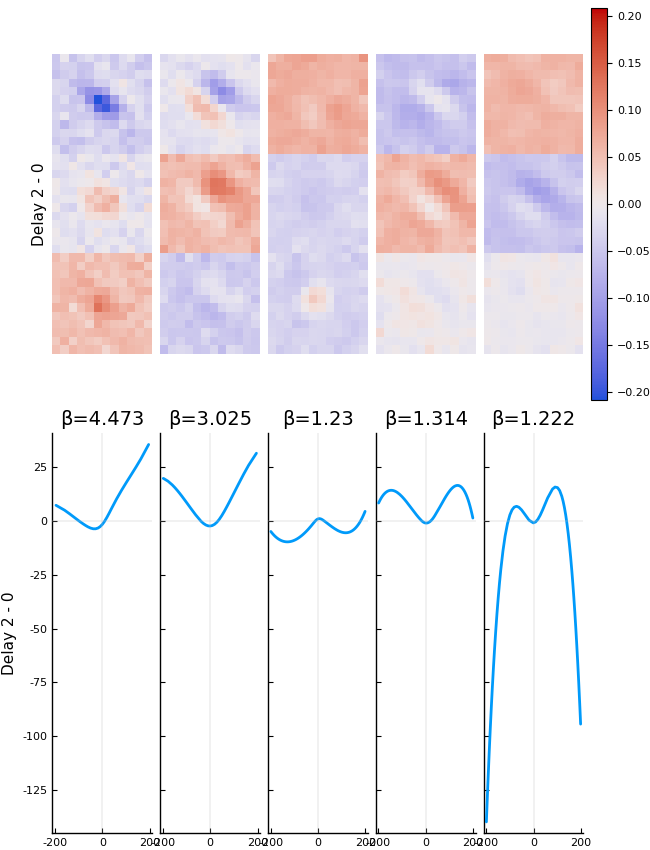

In [138]:
plotmodel(model,hp)

## Benchmark

In [ ]:
using BenchmarkTools
@btime model,models = epprcv(x,y,hp);